In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
# Load the dataset
df = pd.read_csv(r"C:\\Users\\sunai\\Desktop\\imdb_top_1000.csv")


In [4]:
# Data Cleaning
df['Runtime'] = df['Runtime'].str.extract(r'(\d+)').astype(float)
df['Gross'] = df['Gross'].str.replace(',', '', regex=True).astype(float)


In [5]:
# Function to print section headers
def print_header(title, level=1):
    print(f"{'#' * level} {title}")
    print("=" * 80)

In [6]:
# Function to print sub-section headers
def print_subheader(title):
    print(f"\n## {title}")
    print("-" * 80)


In [7]:
# Main Analysis
print_header("IMDb Top 1000 Movies Analysis")
print(f"**Dataset Overview**: Analysis of the top 1000 IMDb movies.")
print(f"**Date of Analysis**: March 29, 2025\n")

# IMDb Top 1000 Movies Analysis
**Dataset Overview**: Analysis of the top 1000 IMDb movies.
**Date of Analysis**: March 29, 2025



In [8]:
# 1. Dataset Overview
print_header("1. Dataset Overview", 2)
print(f"- **Shape**: {df.shape}")
print(f"- **Columns**: {', '.join(df.columns)}")
print(f"- **Data Types**:")
print(df.dtypes.to_string())
print("\n")

## 1. Dataset Overview
- **Shape**: (1000, 16)
- **Columns**: Poster_Link, Series_Title, Released_Year, Certificate, Runtime, Genre, IMDB_Rating, Overview, Meta_score, Director, Star1, Star2, Star3, Star4, No_of_Votes, Gross
- **Data Types**:
Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime          float64
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64




In [9]:
# 2. Data Cleaning
print_header("2. Data Cleaning", 2)
print_subheader("Missing Values")
print(df.isnull().sum().to_string())
print(f"\n- **After Dropping Missing Values**: Shape reduced to {df.dropna().shape}")
print(f"- **Duplicates**: {df.duplicated().sum()}")
print("- **Data Transformations**:")
print("  - Runtime: Converted from string to float")
print("  - Gross: Removed commas and converted to float")

## 2. Data Cleaning

## Missing Values
--------------------------------------------------------------------------------
Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169

- **After Dropping Missing Values**: Shape reduced to (714, 16)
- **Duplicates**: 0
- **Data Transformations**:
  - Runtime: Converted from string to float
  - Gross: Removed commas and converted to float


In [10]:
# 3. Sample Data
print_header("3. Sample Data", 2)
print_subheader("Top 10 Rows")
print(df[['Series_Title', 'Released_Year', 'Runtime', 'IMDB_Rating', 'Gross', 'Director']].head(10).to_string(index=False))
print_subheader("Last 10 Rows")
print(df[['Series_Title', 'Released_Year', 'Runtime', 'IMDB_Rating', 'Gross', 'Director']].tail(10).to_string(index=False))


## 3. Sample Data

## Top 10 Rows
--------------------------------------------------------------------------------
                                 Series_Title Released_Year  Runtime  IMDB_Rating       Gross             Director
                     The Shawshank Redemption          1994    142.0          9.3  28341469.0       Frank Darabont
                                The Godfather          1972    175.0          9.2 134966411.0 Francis Ford Coppola
                              The Dark Knight          2008    152.0          9.0 534858444.0    Christopher Nolan
                       The Godfather: Part II          1974    202.0          9.0  57300000.0 Francis Ford Coppola
                                 12 Angry Men          1957     96.0          9.0   4360000.0         Sidney Lumet
The Lord of the Rings: The Return of the King          2003    201.0          8.9 377845905.0        Peter Jackson
                                 Pulp Fiction          1994    154.0          8.

In [11]:
# 4. Descriptive Statistics
print_header("4. Descriptive Statistics", 2)
stats = df.describe(include='all').T
print(stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']].to_string())
print("\n- **Unique Values**:")
print(f"  - Series_Title: {df['Series_Title'].nunique()}")
print(f"  - Director: {df['Director'].nunique()}")
print(f"  - Genres: {df['Genre'].nunique()}")

## 4. Descriptive Statistics
                count             mean               std      min        25%         50%         75%          max
Poster_Link      1000              NaN               NaN      NaN        NaN         NaN         NaN          NaN
Series_Title     1000              NaN               NaN      NaN        NaN         NaN         NaN          NaN
Released_Year    1000              NaN               NaN      NaN        NaN         NaN         NaN          NaN
Certificate       899              NaN               NaN      NaN        NaN         NaN         NaN          NaN
Runtime        1000.0          122.891         28.093671     45.0      103.0       119.0       137.0        321.0
Genre            1000              NaN               NaN      NaN        NaN         NaN         NaN          NaN
IMDB_Rating    1000.0           7.9493          0.275491      7.6        7.7         7.9         8.1          9.3
Overview         1000              NaN               NaN   

In [12]:
# 5. Key Findings
print_header("5. Key Findings", 2)

print_subheader("5.1 Long Movies (Runtime >= 180 minutes)")
long_movies = df[df['Runtime'] >= 180][['Series_Title', 'Runtime']].sort_values(by='Runtime', ascending=False)
print(long_movies.head(7).to_string(index=False))

print_subheader("5.2 Year with Highest Average Voting")
avg_vote_by_year = df.groupby('Released_Year')['No_of_Votes'].mean().sort_values(ascending=False)
print(f"- **Year**: {avg_vote_by_year.index[0]}")
print(f"- **Average Votes**: {avg_vote_by_year.iloc[0]:,.1f}")

print_subheader("5.3 Year with Highest Average Revenue")
avg_revenue_by_year = df.groupby('Released_Year')['Gross'].mean().sort_values(ascending=False)
print(f"- **Year**: {avg_revenue_by_year.index[0]}")
print(f"- **Average Revenue**: ${avg_revenue_by_year.iloc[0]:,.0f}")

print_subheader("5.4 Top Directors by Average Rating (Top 10)")
avg_rating_by_director = df.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False).head(10)
print(avg_rating_by_director.round(2).to_string())

print_subheader("5.5 Top 10 Lengthy Movies")
top10_lengthy = df.nlargest(10, 'Runtime')[['Series_Title', 'Runtime']]
print(top10_lengthy.to_string(index=False))

print_subheader("5.6 Movies Per Year (Top 10)")
movies_per_year = df['Released_Year'].value_counts().sort_index().head(10)
print(movies_per_year.to_string())

print_subheader("5.7 Highest Revenue Movie")
highest_revenue_movie = df.nlargest(1, 'Gross')[['Series_Title', 'Gross']]
print(highest_revenue_movie.to_string(index=False))

print_subheader("5.8 Top 10 Highest Rated Movies")
top10_rated = df.nlargest(10, 'IMDB_Rating')[['Series_Title', 'Director', 'IMDB_Rating']]
print(top10_rated.to_string(index=False))

print_subheader("5.9 Top 10 Highest Revenue Movies")
top10_revenue = df.nlargest(10, 'Gross')[['Series_Title', 'Gross']]
print(top10_revenue.to_string(index=False))

print_subheader("5.10 Rating vs Revenue Correlation")
correlation = df['IMDB_Rating'].corr(df['Gross'])
print(f"- **Correlation**: {correlation:.2f} (Weak positive correlation)")

print_subheader("5.11 Rating Categories")
def rating_category(rating):
    if rating >= 8.5: return 'Excellent'
    elif rating >= 7.0: return 'Good'
    else: return 'Average'
df['Rating_Category'] = df['IMDB_Rating'].apply(rating_category)
rating_counts = df['Rating_Category'].value_counts()
print(rating_counts.to_string())

print_subheader("5.12 Action Movies")
action_movies = df[df['Genre'].str.contains('Action', case=False, na=False)]
print(f"- **Count**: {len(action_movies)}")

print_subheader("5.13 Unique Genres")
all_genres = df['Genre'].str.split(', ').explode()
unique_genres = all_genres.unique()
print(f"- **Total**: {len(unique_genres)}")
print(f"- **Examples**: {', '.join(unique_genres[:5])} (and more)")

print_subheader("5.14 Films Per Genre (Top 10)")
genre_counts = all_genres.value_counts().head(10)
print(genre_counts.to_string())


## 5. Key Findings

## 5.1 Long Movies (Runtime >= 180 minutes)
--------------------------------------------------------------------------------
                     Series_Title  Runtime
               Gangs of Wasseypur    321.0
                           Hamlet    242.0
               Gone with the Wind    238.0
      Once Upon a Time in America    229.0
               Lawrence of Arabia    228.0
Lagaan: Once Upon a Time in India    224.0
             The Ten Commandments    220.0

## 5.2 Year with Highest Average Voting
--------------------------------------------------------------------------------
- **Year**: 1994
- **Average Votes**: 666,532.2

## 5.3 Year with Highest Average Revenue
--------------------------------------------------------------------------------
- **Year**: 2018
- **Average Revenue**: $186,268,383

## 5.4 Top Directors by Average Rating (Top 10)
--------------------------------------------------------------------------------
Director
Frank Darabont        8.95

In [13]:
# 6. Visualizations
print_header("6. Visualizations", 2)
print("Visualizations are generated below (descriptions only):")
print("- Runtime Distribution: Histogram of movie runtimes.")
print("- Votes by Year: Line plot of average votes over time.")
print("- Revenue by Year: Line plot of average revenue over time.")
print("- Top Directors by Rating: Bar plot of top 10 directors.")
print("- Movies Released Per Year: Bar plot of movie counts by year.")
print("- Top Rated Movies: Bar plot of top 10 rated movies.")
print("- Top Revenue Movies: Bar plot of top 10 revenue movies.")
print("- Rating vs Revenue: Scatter plot showing correlation.")
print("- Rating Categories: Count plot of rating categories.")
print("- Genre Distribution: Bar plot of top 15 genres.")


## 6. Visualizations
Visualizations are generated below (descriptions only):
- Runtime Distribution: Histogram of movie runtimes.
- Votes by Year: Line plot of average votes over time.
- Revenue by Year: Line plot of average revenue over time.
- Top Directors by Rating: Bar plot of top 10 directors.
- Movies Released Per Year: Bar plot of movie counts by year.
- Top Rated Movies: Bar plot of top 10 rated movies.
- Top Revenue Movies: Bar plot of top 10 revenue movies.
- Rating vs Revenue: Scatter plot showing correlation.
- Rating Categories: Count plot of rating categories.
- Genre Distribution: Bar plot of top 15 genres.


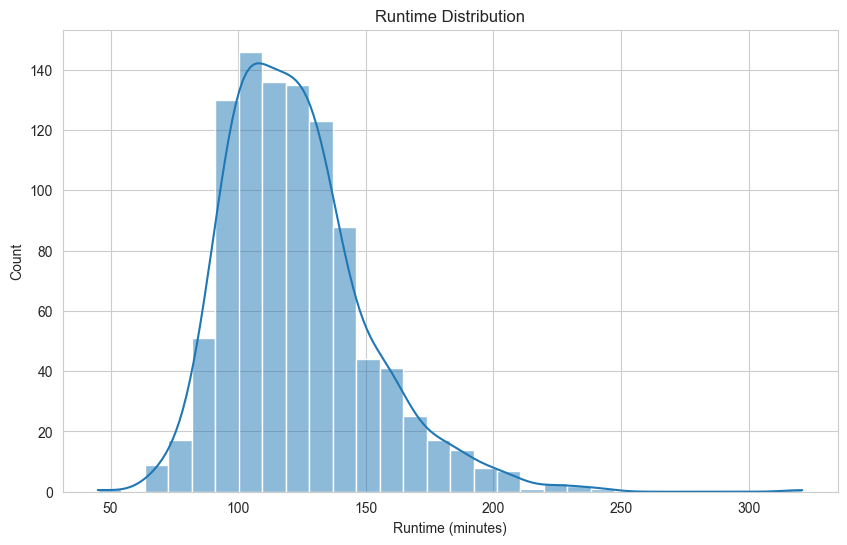

C:\Users\sunai\AppData\Local\Temp\ipykernel_3752\1031486353.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Released_Year', y='No_of_Votes', ci=None)


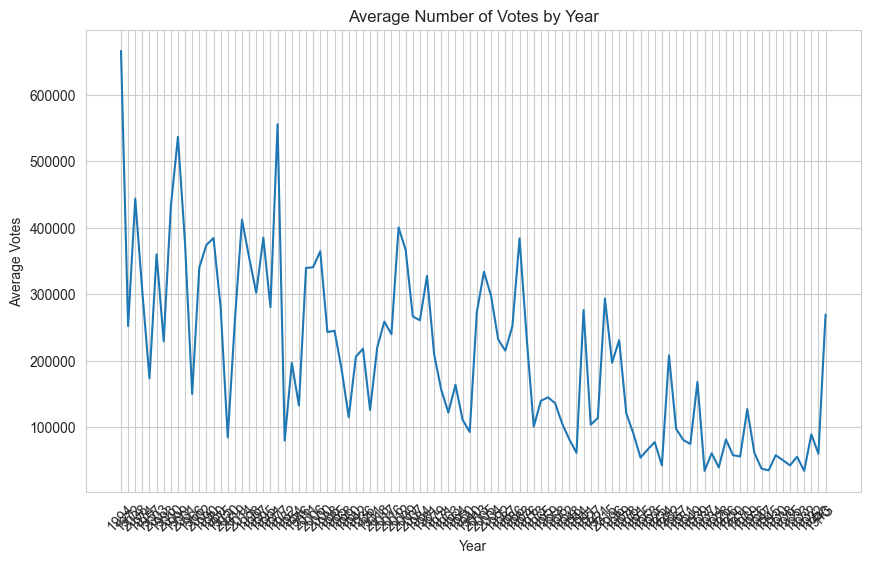

C:\Users\sunai\AppData\Local\Temp\ipykernel_3752\1031486353.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_rated['IMDB_Rating'], y=top10_rated['Series_Title'], palette="rocket")


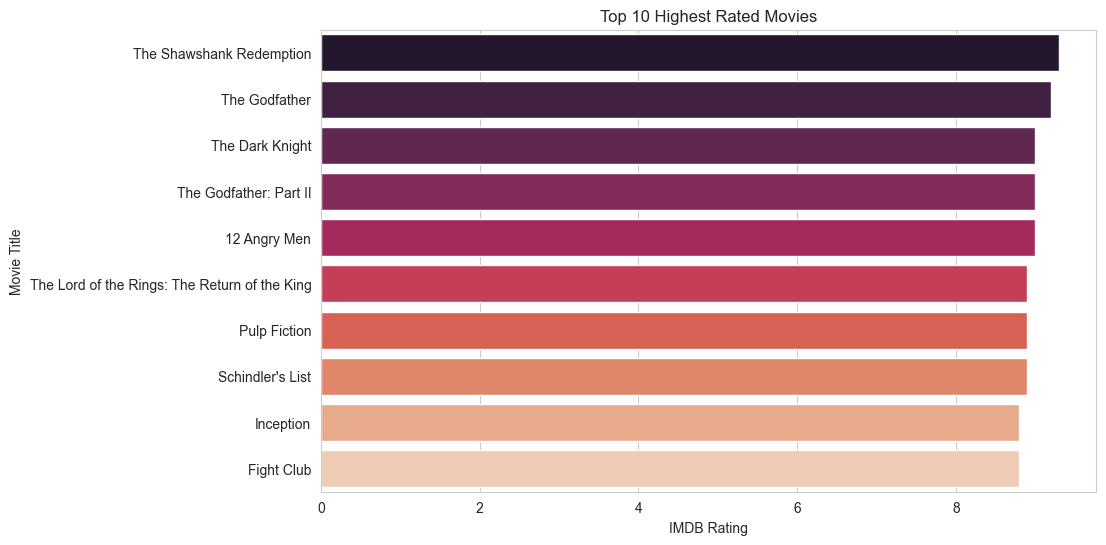

In [14]:
# Generate Visualizations (limited to a few for brevity)
plt.figure()
sns.histplot(df['Runtime'], bins=30, kde=True)
plt.title("Runtime Distribution")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Count")
plt.show()

plt.figure()
sns.lineplot(data=df, x='Released_Year', y='No_of_Votes', ci=None)
plt.title("Average Number of Votes by Year")
plt.xlabel("Year")
plt.ylabel("Average Votes")
plt.xticks(rotation=45)
plt.show()

plt.figure()
sns.barplot(x=top10_rated['IMDB_Rating'], y=top10_rated['Series_Title'], palette="rocket")
plt.title("Top 10 Highest Rated Movies")
plt.xlabel("IMDB Rating")
plt.ylabel("Movie Title")
plt.show()

18. Top years by rating:
Released_Year
1936    8.500000
1921    8.300000
1957    8.277778
1994    8.238462
1942    8.233333
1931    8.200000
1924    8.200000
1927    8.200000
1954    8.166667
1941    8.150000
Name: IMDB_Rating, dtype: float64




C:\Users\sunai\AppData\Local\Temp\ipykernel_3752\4152254234.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Released_Year', y='IMDB_Rating', ci=None)


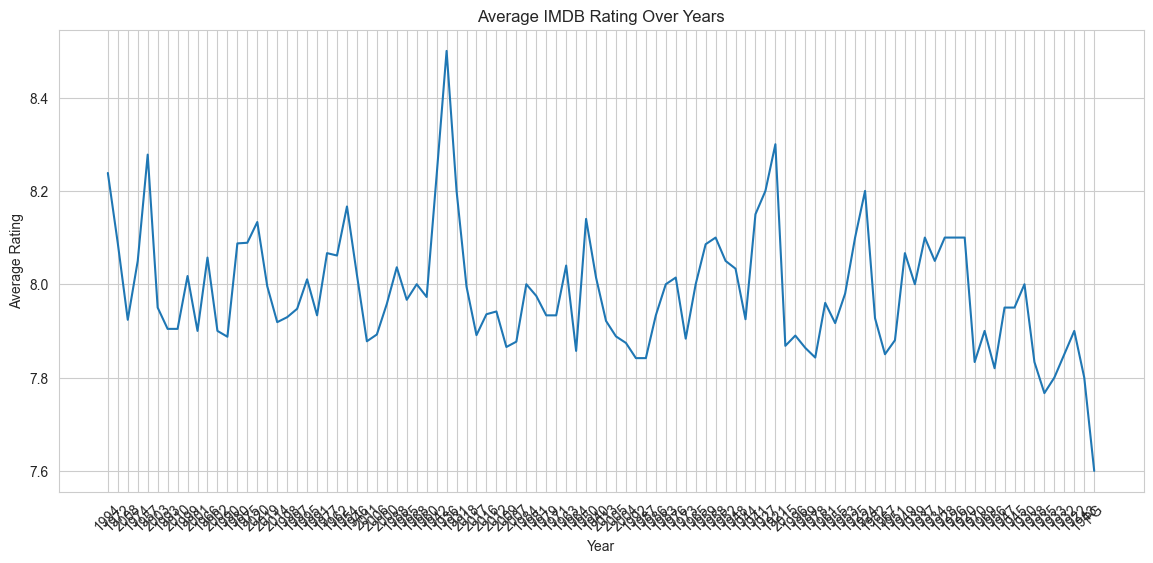

In [16]:
# 7. Average Rating Year Wise
avg_rating_by_year = df.groupby('Released_Year')['IMDB_Rating'].mean().sort_values(ascending=False)
print("18. Top years by rating:")
print(avg_rating_by_year.head(10))
print("\n" + "="*80 + "\n")

# Visualization: Rating Trend Over Years
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Released_Year', y='IMDB_Rating', ci=None)
plt.title("Average IMDB Rating Over Years")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

19. Rating-Revenue correlation: 0.09592277110132387




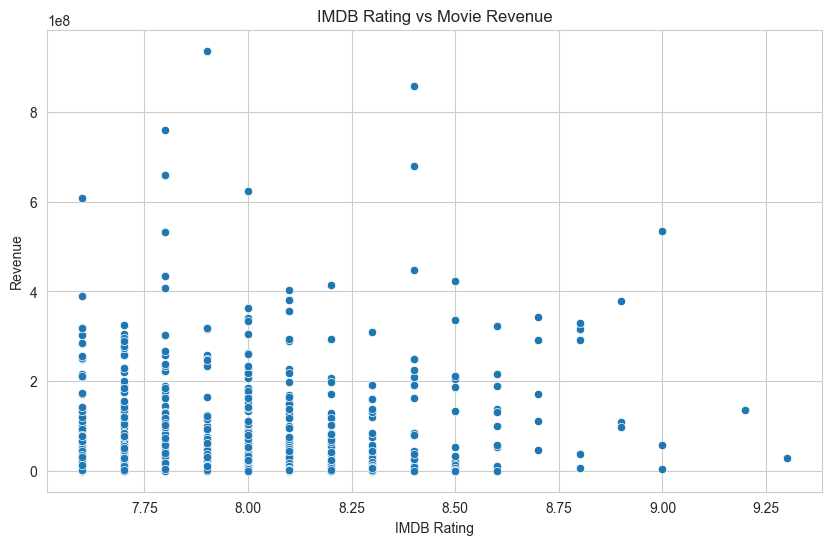

In [17]:
# 8. Rating vs Revenue Correlation
correlation = df['IMDB_Rating'].corr(df['Gross'])
print("19. Rating-Revenue correlation:", correlation)
print("\n" + "="*80 + "\n")

# Visualization: Rating vs Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='IMDB_Rating', y='Gross')
plt.title("IMDB Rating vs Movie Revenue")
plt.xlabel("IMDB Rating")
plt.ylabel("Revenue")
plt.show()


In [18]:
# 9. Classify Movies Based on Ratings
def rating_category(rating):
    if rating >= 8.5:
        return 'Excellent'
    elif rating >= 7.0:
        return 'Good'
    else:
        return 'Average'

df['Rating_Category'] = df['IMDB_Rating'].apply(rating_category)
rating_counts = df['Rating_Category'].value_counts()
print("20. Rating categories:")
print(rating_counts)
print("\n" + "="*80 + "\n")

20. Rating categories:
Rating_Category
Good         947
Excellent     53
Name: count, dtype: int64




C:\Users\sunai\AppData\Local\Temp\ipykernel_3752\3366916766.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Rating_Category', order=['Excellent', 'Good', 'Average'], palette="Set2")


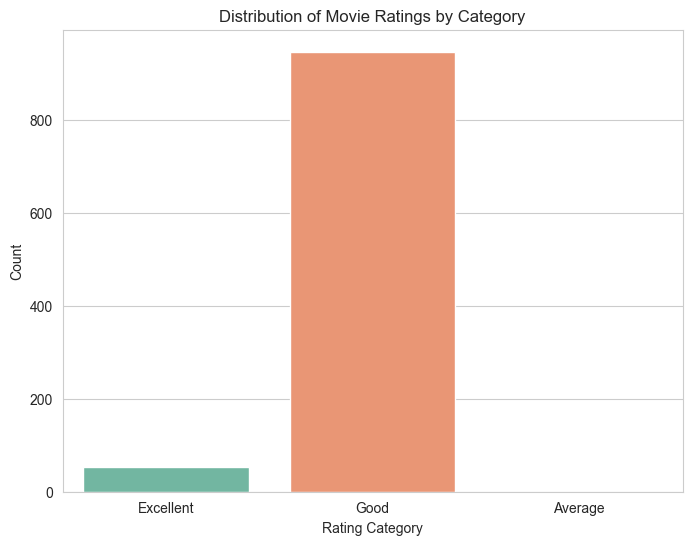

In [19]:
# Visualization: Rating Categories
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Rating_Category', order=['Excellent', 'Good', 'Average'], palette="Set2")
plt.title("Distribution of Movie Ratings by Category")
plt.xlabel("Rating Category")
plt.ylabel("Count")
plt.show()

In [20]:
# 10. Count Action Movies
action_movies = df[df['Genre'].str.contains('Action', case=False, na=False)]
print("21. Number of Action movies:", len(action_movies))
print("\n" + "="*80 + "\n")


21. Number of Action movies: 189




In [21]:
# 11. Unique Genres
all_genres = df['Genre'].str.split(', ').explode()
unique_genres = all_genres.unique()
print("22. Unique genres:")
print(unique_genres)
print("\n" + "="*80 + "\n")

22. Unique genres:
['Drama' 'Crime' 'Action' 'Adventure' 'Biography' 'History' 'Sci-Fi'
 'Romance' 'Western' 'Fantasy' 'Comedy' 'Thriller' 'Animation' 'Family'
 'War' 'Mystery' 'Music' 'Horror' 'Musical' 'Film-Noir' 'Sport']




In [22]:
# 12. Number of Films Per Genre
genre_counts = all_genres.value_counts()
print("23. Films per genre:")
print(genre_counts)
print("\n" + "="*80 + "\n")


23. Films per genre:
Genre
Drama        724
Comedy       233
Crime        209
Adventure    196
Action       189
Thriller     137
Romance      125
Biography    109
Mystery       99
Animation     82
Sci-Fi        67
Fantasy       66
History       56
Family        56
War           51
Music         35
Horror        32
Western       20
Film-Noir     19
Sport         19
Musical       17
Name: count, dtype: int64




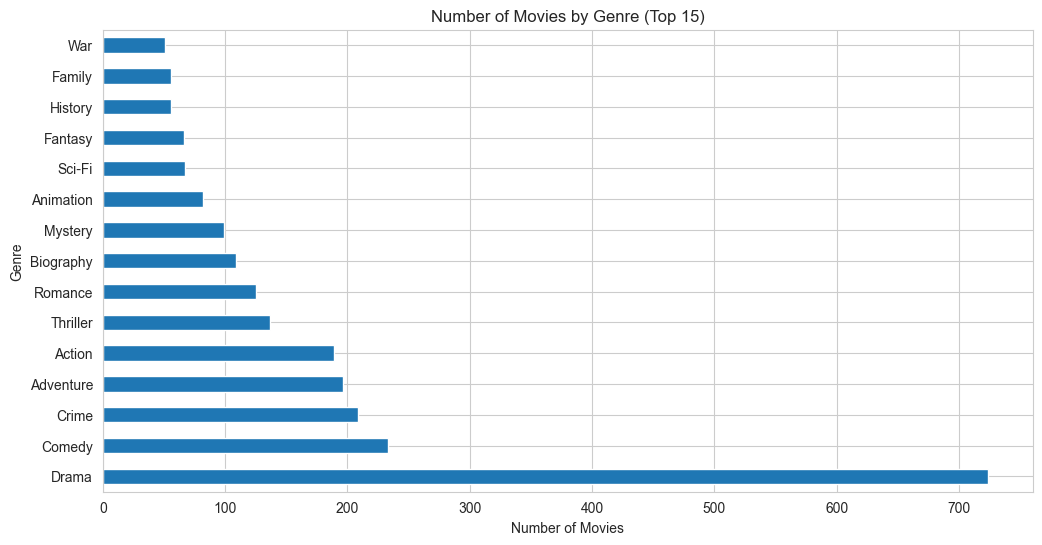

In [23]:
# Visualization: Top Genres
plt.figure(figsize=(12, 6))
genre_counts.head(15).plot(kind='barh')  # Showing top 15 for readability
plt.title("Number of Movies by Genre (Top 15)")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()

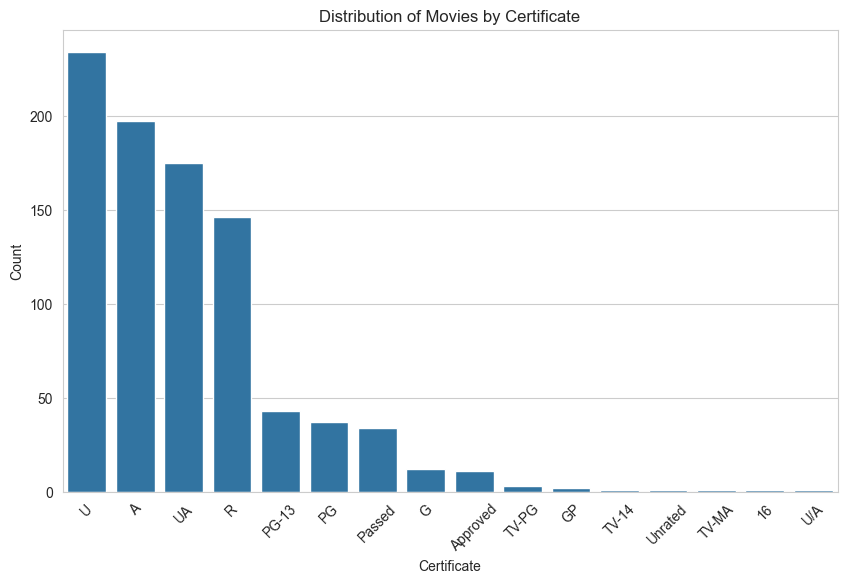

In [24]:
# Additional Visualizations

# Certificate Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Certificate', order=df['Certificate'].value_counts().index)
plt.title("Distribution of Movies by Certificate")
plt.xlabel("Certificate")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


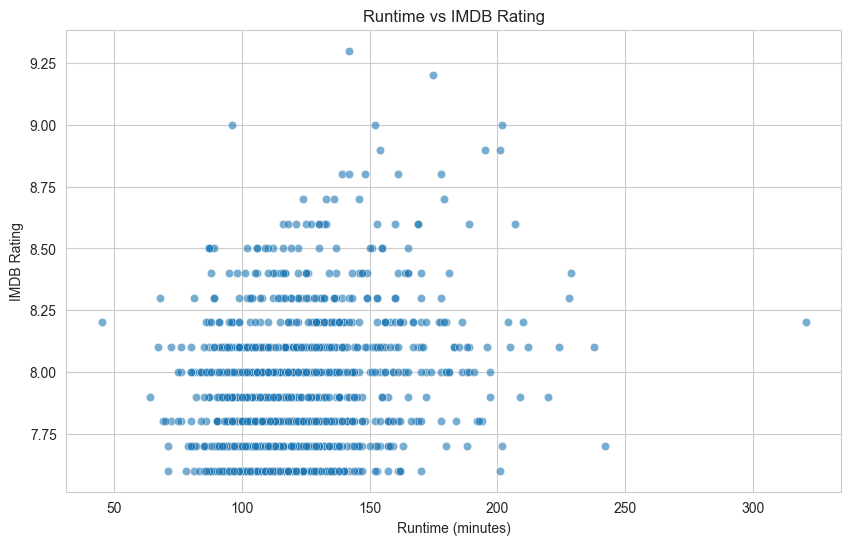

In [25]:
# Runtime vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Runtime', y='IMDB_Rating', alpha=0.6)
plt.title("Runtime vs IMDB Rating")
plt.xlabel("Runtime (minutes)")
plt.ylabel("IMDB Rating")
plt.show()

C:\Users\sunai\AppData\Local\Temp\ipykernel_3752\2251330798.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors.values, y=top_actors.index, palette="viridis")


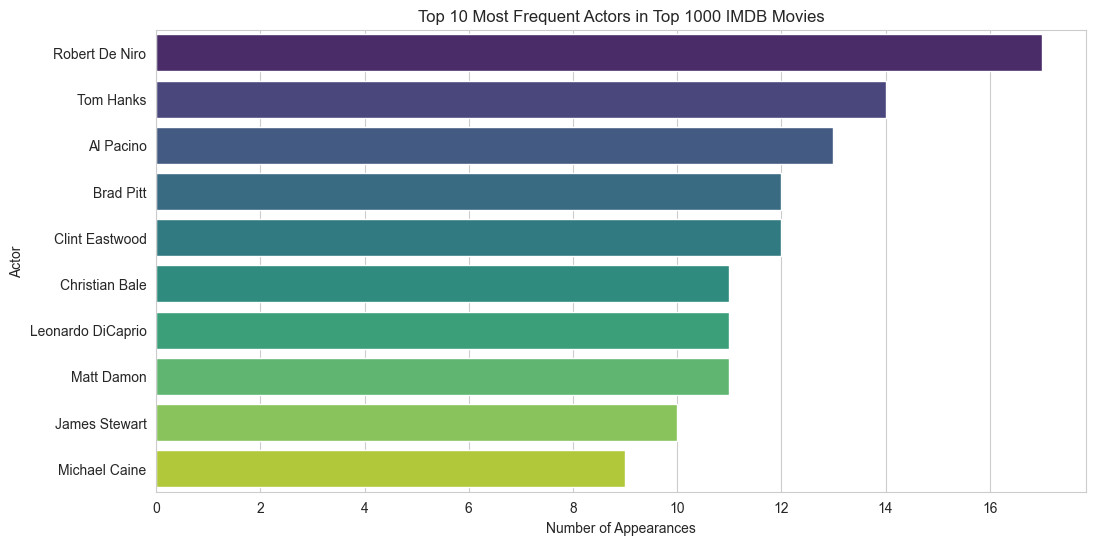

In [26]:
# Top Actors Analysis
# Create a list of all actors by combining the Star columns
all_actors = pd.concat([df['Star1'], df['Star2'], df['Star3'], df['Star4']])
top_actors = all_actors.value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette="viridis")
plt.title("Top 10 Most Frequent Actors in Top 1000 IMDB Movies")
plt.xlabel("Number of Appearances")
plt.ylabel("Actor")
plt.show()

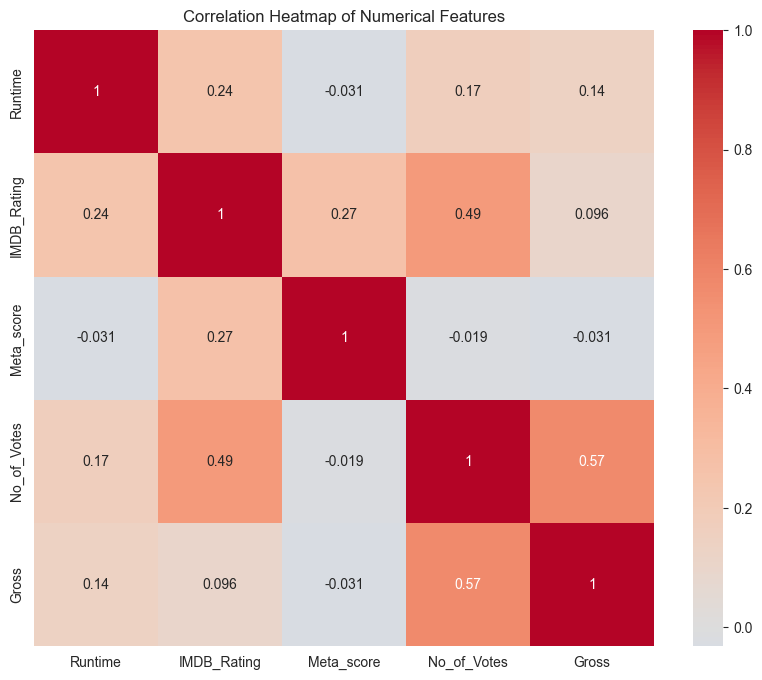

In [27]:
# Correlation Heatmap
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()